In [51]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Reviews.csv') #content/drive/Reviews.csv -> try later
df = df.head(500) #as data huge toh cut kr lia
print(df.shape)

(500, 10)


In [11]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [12]:
df['Text'].values[0:5] #first 5 text values

array(['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
       'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".',
       'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.',
    

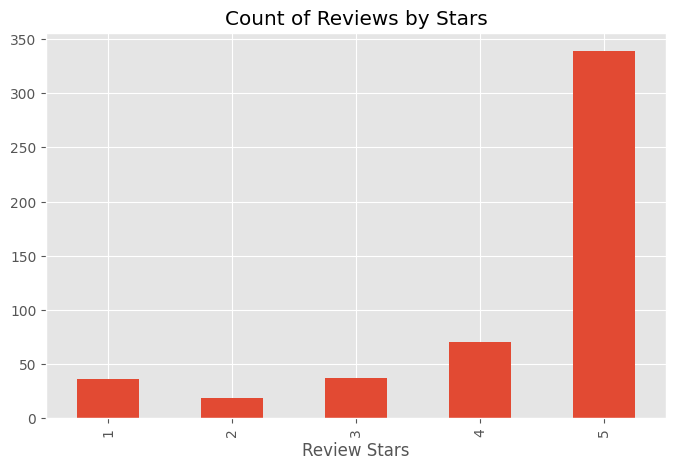

In [13]:
rev = df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Stars', figsize=(8,5))
rev.set_xlabel('Review Stars')
plt.show()

##NLTK


In [14]:
example = df['Text'].values[75]
print(example)

No tea flavor at all. Just whole brunch of artifial flavors. It is not returnable. I wasted 20+ bucks.


In [15]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['No', 'tea', 'flavor', 'at', 'all', '.', 'Just', 'whole', 'brunch', 'of']

In [16]:
tagged = nltk.pos_tag(tokens)

In [17]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  No/DT
  tea/NN
  flavor/NN
  at/IN
  all/DT
  ./.
  Just/NNP
  whole/JJ
  brunch/NN
  of/IN
  artifial/JJ
  flavors/NNS
  ./.
  It/PRP
  is/VBZ
  not/RB
  returnable/JJ
  ./.
  I/PRP
  wasted/VBD
  20+/CD
  bucks/NNS
  ./.)


#VADER SENTIMENT


In [19]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [23]:
sia.polarity_scores('I am disgusted.') #Intensity Scores

{'neg': 0.773, 'neu': 0.227, 'pos': 0.0, 'compound': -0.5267}

In [25]:
sia.polarity_scores(example)

{'neg': 0.106, 'neu': 0.768, 'pos': 0.126, 'compound': 0.1098}

##Running Polarity Score on Entire Dataset

In [41]:
#Sentiment Score
res = {}
for i,row in tqdm(df.iterrows(), total=len(df)):
  text = row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [44]:
v= pd.DataFrame(res).T
v= v.reset_index().rename(columns={'index':'Id'})
v= v.merge(df, how='left') #left merge v and df

In [45]:
v

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


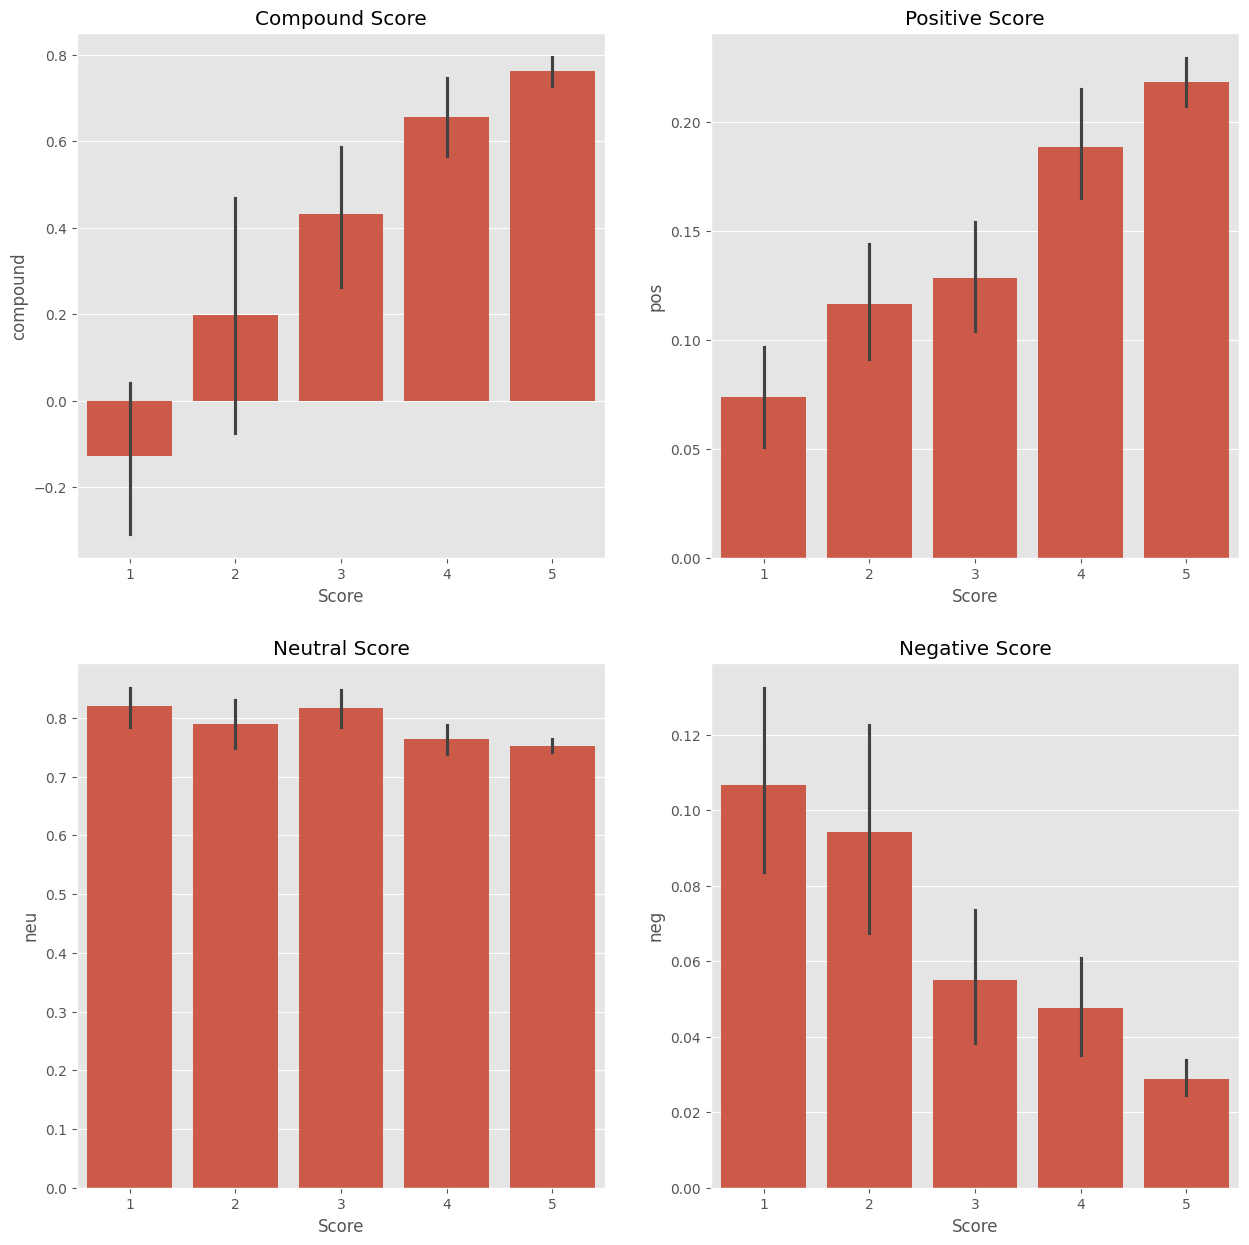

In [56]:
fig,axs = plt.subplots(2,2,figsize=(15,15))
sns.barplot(data = v,x = 'Score',y='compound', ax = axs[0,0])
sns.barplot(data = v,x = 'Score',y='pos' , ax = axs[0,1])
sns.barplot(data = v,x = 'Score',y='neu' , ax = axs[1,0])
sns.barplot(data = v,x = 'Score',y='neg' , ax = axs[1,1])
axs[0,0].set_title("Compound Score")
axs[0,1].set_title("Positive Score")
axs[1,0].set_title("Neutral Score")
axs[1,1].set_title("Negative Score")
plt.show()

#**ROBERTA PRETRAINED MODEL**

In [58]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [59]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Vader result on Example

In [61]:
print(example)
sia.polarity_scores(example)

No tea flavor at all. Just whole brunch of artifial flavors. It is not returnable. I wasted 20+ bucks.


{'neg': 0.106, 'neu': 0.768, 'pos': 0.126, 'compound': 0.1098}

In [71]:
#Running for Roberta Model
encoded_text= tokenizer(example,return_tensors='pt')
out = model(**encoded_text)
score = out[0][0].detach().numpy()
score = softmax(score)
score_dict = {
    'Negative' : score[0],
    'Neutral' : score[1],
    'Positive' : score[2]
}
score_dict

{'Negative': 0.9441382, 'Neutral': 0.05016807, 'Positive': 0.0056936946}

In [74]:
def robert_ps(example):
  encoded_text= tokenizer(example,return_tensors='pt')
  output=model(**encoded_text)
  scores=output[0][0].detach().numpy()
  scores=softmax(scores)
  scores_dict={
      'Roberta_Negative':scores[0],
      'Roberta_Neutral':scores[1],
      'Roberta_Positive':scores[2]
  }
  return scores_dict

In [81]:
# res = {}
for i,row in tqdm(df.iterrows(), total=len(df)):
  try:
    text = row['Text']
    myid = row['Id']
    vader_res = sia.polarity_scores(text)
    vader_res_rename = {}
    for key,value in vader_res.items():
      vader_res_rename[f'vader_{key}'] = value
    roberta_res = robert_ps(text)
    both = {**vader_res_rename,**roberta_res}
    res[myid] = both

  except RuntimeError:
    print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [83]:
res_df= pd.DataFrame(res).T
res_df= res_df.reset_index().rename(columns={'index':'Id'})
res_df= res_df.merge(df, how='left') #left merge v and df

##Comparing Scores between Models

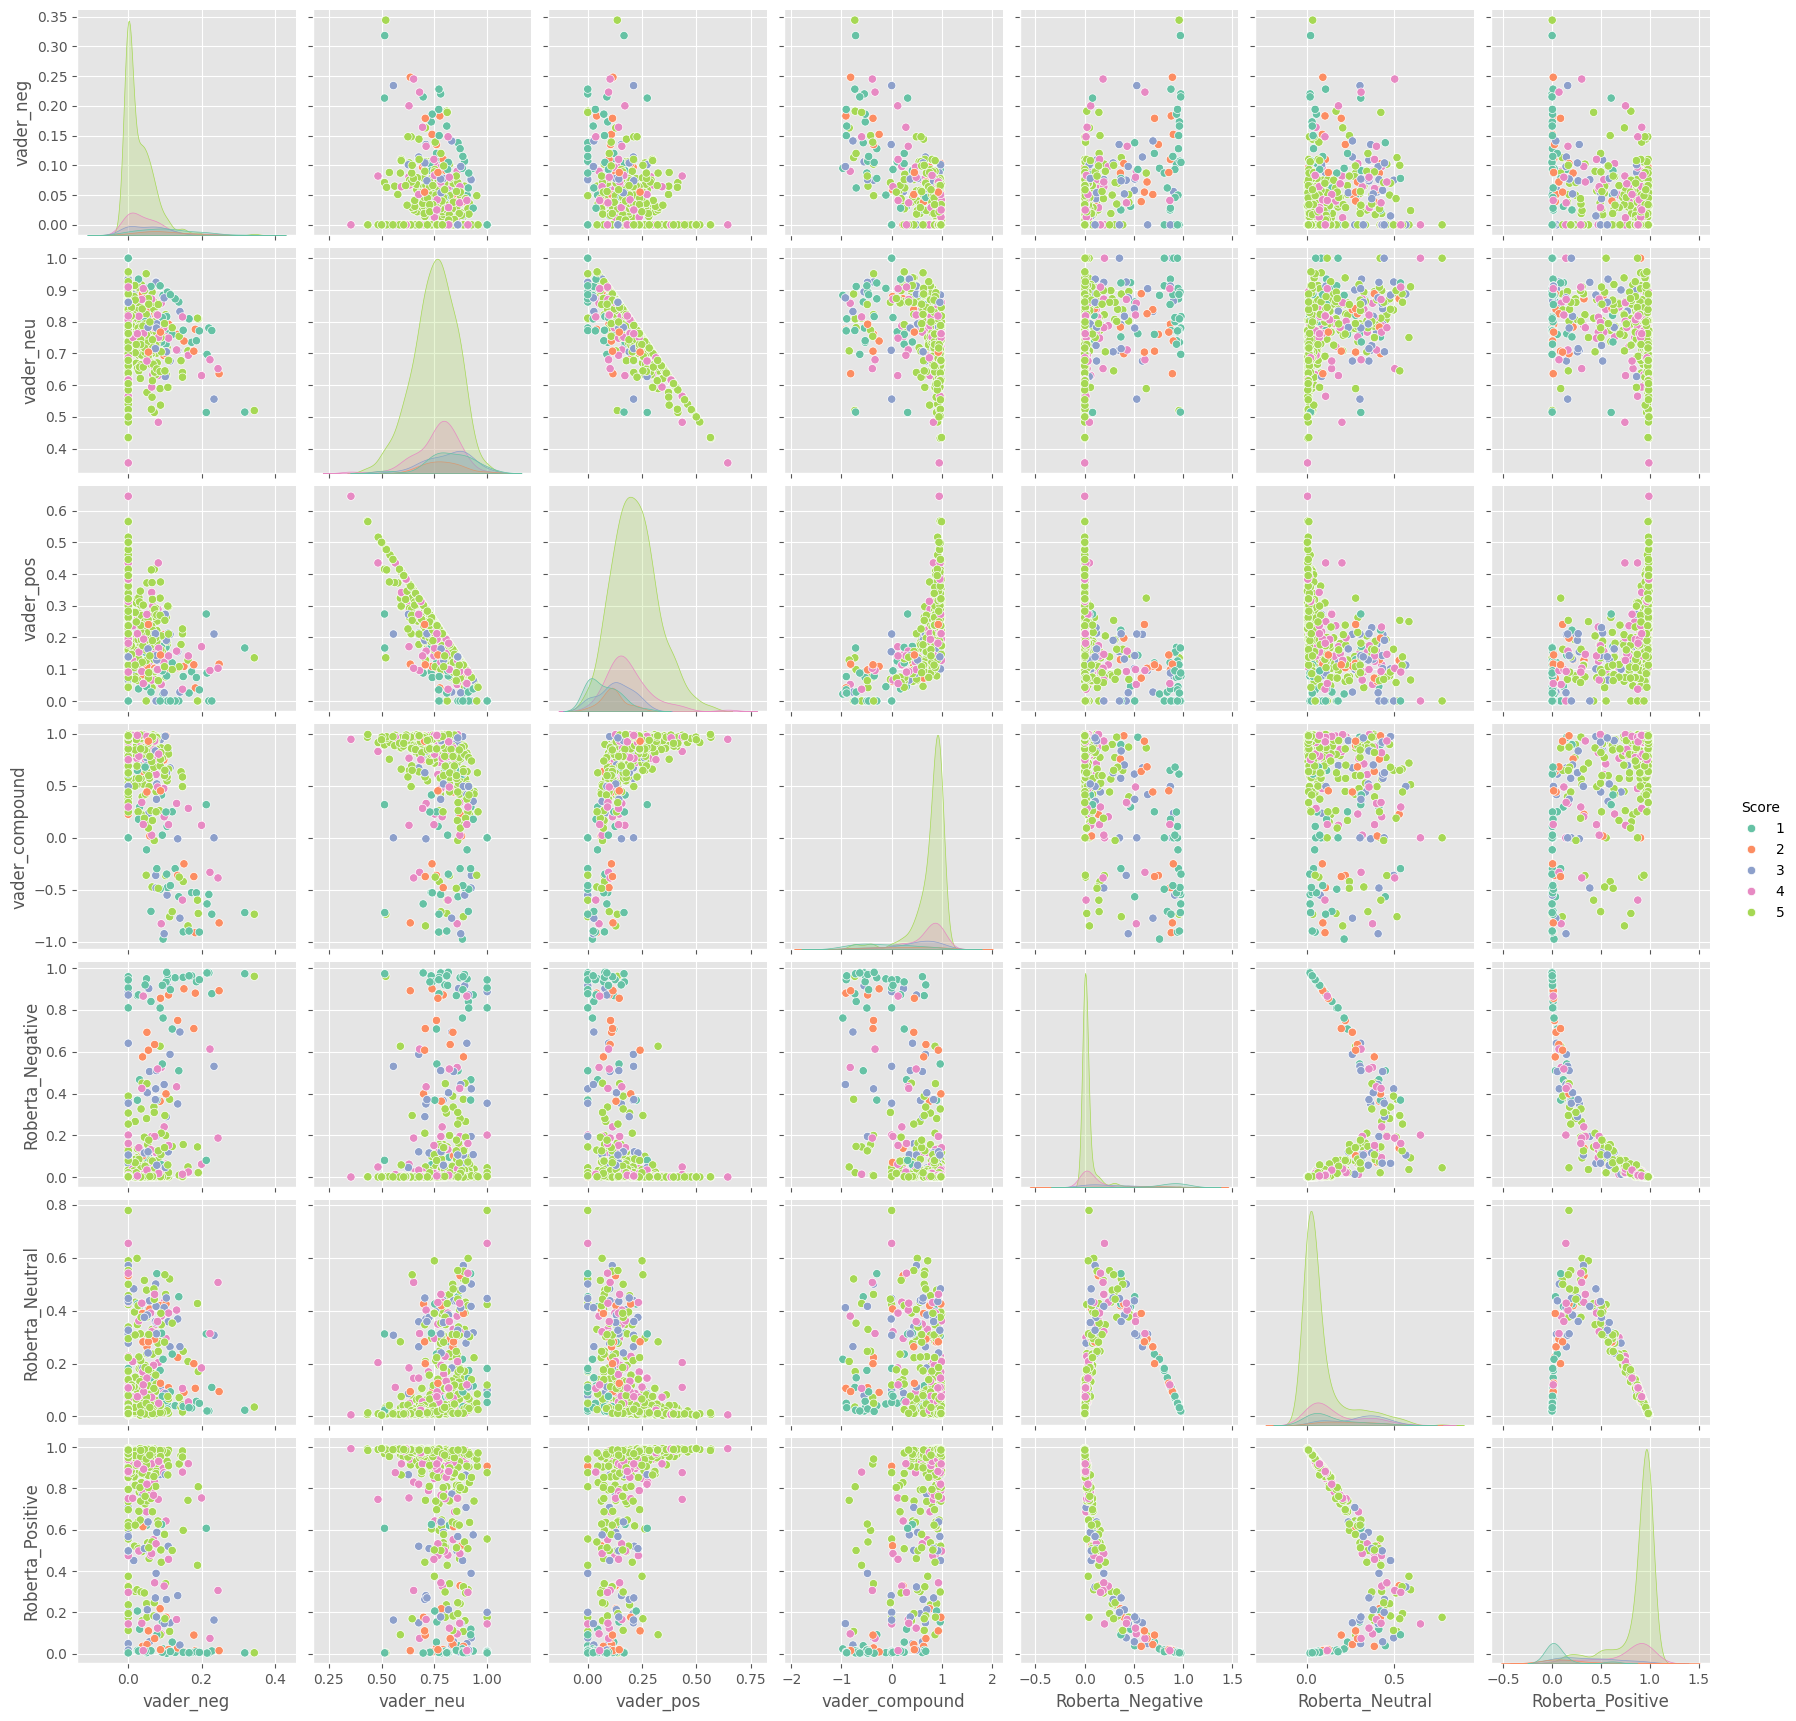

In [85]:
sns.pairplot(data=res_df, vars=['vader_neg','vader_neu','vader_pos','vader_compound','Roberta_Negative','Roberta_Neutral','Roberta_Positive'],
             hue='Score',palette='Set2')
plt.show()

##Checking if Model Scoring differ from what we think it should
###Positive Sentiment- 1 Star Review

In [98]:
res_df.query('Score == 1').sort_values('Roberta_Positive',ascending = False )['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [91]:
res_df.query('Score == 1').sort_values('vader_pos',ascending = False )['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

###Negative Sentiment- 5 Star Review

In [93]:
res_df.query('Score == 5').sort_values('Roberta_Negative',ascending = False )['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [94]:
res_df.query('Score == 5').sort_values('vader_neg',ascending = False )['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

#Transformers Pipeline

In [1]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [3]:
sent_pipeline("So we cancelled the order.  It was cancelled without any problem.  That is a positive note...")

[{'label': 'POSITIVE', 'score': 0.9988051652908325}]